# Table of Contents
 <p><div class="lev1"><a href="#Supervised-Topic-Model"><span class="toc-item-num">1 - </span>Supervised Topic Model</a></div><div class="lev2"><a href="#Read-and-tokenize-moview-review-dataset"><span class="toc-item-num">1.1 - </span>Read and tokenize moview review dataset</a></div><div class="lev2"><a href="#Infer-topics-with-SupervisedLDA"><span class="toc-item-num">1.2 - </span>Infer topics with SupervisedLDA</a></div>

# Supervised Topic Model  

This notebook shows an example of supervised topic model with the dataset provided by [Bo Pang](https://www.cs.cornell.edu/people/pabo/movie-review-data/)

In [1]:
import os
import logging

import numpy as np
import matplotlib.pyplot as plt

from gensim.models import SLdaModel

%matplotlib inline  

logger = logging.getLogger('SLdaModel')
logger.propagate = False

## Read and tokenize moview review dataset

In [2]:
datafolder = '../data/scaledata/Dennis+Schwartz/'
rating_file = os.path.join(datafolder, 'rating.Dennis+Schwartz')
review_file = os.path.join(datafolder, 'subj.Dennis+Schwartz')
with open(rating_file, 'r') as f:
    ratings = np.array([float(line.strip()) for line in f.readlines()])
with open(review_file, 'r') as f:
    reviews = [line for line in f.readlines()]

voca, word_ids, word_cnt = get_ids_cnt(reviews)
corpus = convert_cnt_to_list(word_ids, word_cnt)

num doc 1027 num_voca 10526


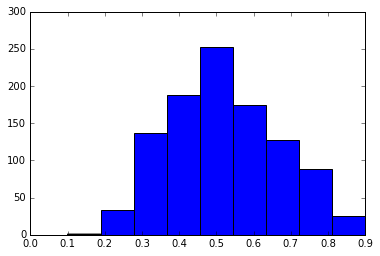

max rating 0.9 	min rating 0.1


In [3]:
n_doc = len(corpus)
n_voca = voca.size
print('num doc', n_doc, 'num_voca', n_voca)
plt.hist(ratings, bins=9)
plt.show()
print('max rating', np.max(ratings), '\tmin rating', np.min(ratings))

## Infer topics with SupervisedLDA

In [4]:
n_topic = 50
r_var = 0.01

model = GibbsSupervisedLDA(n_doc, n_voca, n_topic, sigma=r_var)
model.fit(corpus, ratings)

2016-02-10 19:43:04 INFO:GibbsSupervisedLDA:[ITER] 0,	MAE:0.07,	log_likelihood:-1200104.10
2016-02-10 19:43:13 INFO:GibbsSupervisedLDA:[ITER] 1,	MAE:0.07,	log_likelihood:-1115555.47
2016-02-10 19:43:22 INFO:GibbsSupervisedLDA:[ITER] 2,	MAE:0.07,	log_likelihood:-1073563.29
2016-02-10 19:43:32 INFO:GibbsSupervisedLDA:[ITER] 3,	MAE:0.07,	log_likelihood:-1048468.36
2016-02-10 19:43:41 INFO:GibbsSupervisedLDA:[ITER] 4,	MAE:0.07,	log_likelihood:-1032117.31
2016-02-10 19:43:49 INFO:GibbsSupervisedLDA:[ITER] 5,	MAE:0.08,	log_likelihood:-1020609.06
2016-02-10 19:43:58 INFO:GibbsSupervisedLDA:[ITER] 6,	MAE:0.08,	log_likelihood:-1012588.62
2016-02-10 19:44:07 INFO:GibbsSupervisedLDA:[ITER] 7,	MAE:0.08,	log_likelihood:-1006078.19
2016-02-10 19:44:17 INFO:GibbsSupervisedLDA:[ITER] 8,	MAE:0.08,	log_likelihood:-1000468.34
2016-02-10 19:44:26 INFO:GibbsSupervisedLDA:[ITER] 9,	MAE:0.08,	log_likelihood:-996064.31
2016-02-10 19:44:35 INFO:GibbsSupervisedLDA:[ITER] 10,	MAE:0.08,	log_likelihood:-991448.64


In [5]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Eta', model.eta[ti] ,'Topic', ti ,':\t', ','.join(top_words))

Eta -0.234767820987 Topic 34 :	 bad,could,anything,get,never,movie,another,go,ca,script
Eta -0.214572023979 Topic 41 :	 could,would,get,made,might,anything,many,good,look,never
Eta -0.160506173159 Topic 38 :	 got,far,time,right,way,every,making,part,dull,guess
Eta 0.0219171933193 Topic 49 :	 found,still,subject,intellectual,becomes,sense,tension,fine,talk,century
Eta 0.0419401650241 Topic 10 :	 make,action,good,everything,acting,made,funny,dialogue,script,place
Eta 0.0764470841209 Topic 27 :	 entertainment,value,lot,theme,violent,red,take,mostly,many,easy
Eta 0.128975547132 Topic 21 :	 much,part,might,great,bad,getting,two,away,audience,least
Eta 0.159533085017 Topic 36 :	 done,time,manner,dialogue,never,version,great,production,feeling,right
Eta 0.184797336584 Topic 44 :	 opera,long,interesting,soap,go,telling,picture,chance,different,offering
Eta 0.210652963064 Topic 31 :	 director,enough,done,many,shown,money,movie,must,give,blood
Eta 0.232820782727 Topic 37 :	 good,look,everything,

**The review about one movie, so the topics does not seem to be clearly distinguishable. At least, however, the most negative topics contain words such as `bad`, `never`, and `dull`. And the most positive topics contain word like `great`, `best`, and `masterpeice`.**